In [1]:
#from google.colab import drive
#drive.mount('/content/drive')

# Importing Libraries

In [2]:
#Import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import winsound

# machine learning
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
%matplotlib inline

# Importing data

In [3]:
df_train_initial = pd.read_csv('train_data.csv')
df_test_initial = pd.read_csv('test_data.csv')
df_train_initial.info()
df_test_initial.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 318438 entries, 0 to 318437
Data columns (total 18 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   case_id                            318438 non-null  int64  
 1   Hospital_code                      318438 non-null  int64  
 2   Hospital_type_code                 318438 non-null  object 
 3   City_Code_Hospital                 318438 non-null  int64  
 4   Hospital_region_code               318438 non-null  object 
 5   Available Extra Rooms in Hospital  318438 non-null  int64  
 6   Department                         318438 non-null  object 
 7   Ward_Type                          318438 non-null  object 
 8   Ward_Facility_Code                 318438 non-null  object 
 9   Bed Grade                          318325 non-null  float64
 10  patientid                          318438 non-null  int64  
 11  City_Code_Patient                  3139

### Data Categorization of variables in the dataset
* Columns 
  + case_id
      - ordinal
      - discrete
  + Hospital_code
      - nominal
      - discrete
  + Hospital_type_code
      - categorical
  + City_Code_Hospital
      - nominal
      - discrete
  + Hospital_region_code  
      - categorical
  + Available Extra Rooms in Hospital
      - nominal
      - discrete
  + Department 
      - categorical
  + Ward_Type   
      - categorical
  + Ward_Facility_Code
      - categorical
  + Bed Grade
      - ordinal
      - discrete
  + patientid  
      - nominal
      - discrete
  + City_Code_Patient
      - nominal
      - discrete
  + Type of Admission
      - categorical
  + Severity of Illness
      - categorical
  + Visitors with Patient
      - nominal
      - discrete
  + Age        
      - categorical
  + Admission_Deposit
      - nominal
      - discrete
  + Stay
      - categorical

# Data Preprocessing

**Identifying missing value and outlier treatment**

In [4]:
#Looking for null values in the training data set
df_train_initial.isnull().sum()

case_id                                 0
Hospital_code                           0
Hospital_type_code                      0
City_Code_Hospital                      0
Hospital_region_code                    0
Available Extra Rooms in Hospital       0
Department                              0
Ward_Type                               0
Ward_Facility_Code                      0
Bed Grade                             113
patientid                               0
City_Code_Patient                    4532
Type of Admission                       0
Severity of Illness                     0
Visitors with Patient                   0
Age                                     0
Admission_Deposit                       0
Stay                                    0
dtype: int64

In [5]:
df_test_initial.isnull().sum()

case_id                                 0
Hospital_code                           0
Hospital_type_code                      0
City_Code_Hospital                      0
Hospital_region_code                    0
Available Extra Rooms in Hospital       0
Department                              0
Ward_Type                               0
Ward_Facility_Code                      0
Bed Grade                              35
patientid                               0
City_Code_Patient                    2157
Type of Admission                       0
Severity of Illness                     0
Visitors with Patient                   0
Age                                     0
Admission_Deposit                       0
dtype: int64

For the missing values in Bed Grade the mean value was used for imputation. For City Code Patient the mode value was used for imputation. The mode value makes up about 39.5% at 124,011 values of the city code values so we believe adding 4,532 of that value would have the most minimal impact on model performance. 

In [6]:
#Doing Value Imputation 
from sklearn.impute import SimpleImputer


#imputing for the train dataset
impute_mean = SimpleImputer(missing_values=np.nan, strategy='mean')
df_train_initial["Bed Grade"] = impute_mean.fit_transform(df_train_initial[["Bed Grade"]]).ravel()

impute_mode = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
df_train_initial["City_Code_Patient"] = impute_mode.fit_transform(df_train_initial[["City_Code_Patient"]]).ravel()


#imputing for the test dataset
impute_mean = SimpleImputer(missing_values=np.nan, strategy='mean')
df_test_initial["Bed Grade"] = impute_mean.fit_transform(df_test_initial[["Bed Grade"]]).ravel()

#impute_mode = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
#df_train_initial["City_Code_Patient"] = impute_mode.fit_transform(df_train_initial[["City_Code_Patient"]]).ravel()



df_test_initial.replace(np.nan, 0)


,case_id,Hospital_code,Hospital_type_code,City_Code_Hospital,Hospital_region_code,Available Extra Rooms in Hospital,Department,Ward_Type,Ward_Facility_Code,Bed Grade,patientid,City_Code_Patient,Type of Admission,Severity of Illness,Visitors with Patient,Age,Admission_Deposit
0,318439,21,c,3,Z,3,gynecology,S,A,2.0,17006,2.0,Emergency,Moderate,2,71-80,3095.0
1,318440,29,a,4,X,2,gynecology,S,F,2.0,17006,2.0,Trauma,Moderate,4,71-80,4018.0
2,318441,26,b,2,Y,3,gynecology,Q,D,4.0,17006,2.0,Emergency,Moderate,3,71-80,4492.0
3,318442,6,a,6,X,3,gynecology,Q,F,2.0,17006,2.0,Trauma,Moderate,3,71-80,4173.0
4,318443,28,b,11,X,2,gynecology,R,F,2.0,17006,2.0,Trauma,Moderate,4,71-80,4161.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
137052,455491,11,b,2,Y,4,anesthesia,Q,D,3.0,41160,3.0,Emergency,Minor,4,41-50,6313.0
137053,455492,25,e,1,X,2,radiotherapy,R,E,4.0,30985,7.0,Emergency,Moderate,2,0-10,3510.0
137054,455493,30,c,3,Z,2,anesthesia,R,A,4.0,81811,12.0,Urgent,Minor,2,0-10,7190.0
137055,455494,5,a,1,X,2,anesthesia,R,E,4.0,57021,10.0,Trauma,Minor,2,41-50,5435.0


In [7]:
df_train_initial.replace(np.nan, 0)

,case_id,Hospital_code,Hospital_type_code,City_Code_Hospital,Hospital_region_code,Available Extra Rooms in Hospital,Department,Ward_Type,Ward_Facility_Code,Bed Grade,patientid,City_Code_Patient,Type of Admission,Severity of Illness,Visitors with Patient,Age,Admission_Deposit,Stay
0,1,8,c,3,Z,3,radiotherapy,R,F,2.0,31397,7.0,Emergency,Extreme,2,51-60,4911.0,0-10
1,2,2,c,5,Z,2,radiotherapy,S,F,2.0,31397,7.0,Trauma,Extreme,2,51-60,5954.0,41-50
2,3,10,e,1,X,2,anesthesia,S,E,2.0,31397,7.0,Trauma,Extreme,2,51-60,4745.0,31-40
3,4,26,b,2,Y,2,radiotherapy,R,D,2.0,31397,7.0,Trauma,Extreme,2,51-60,7272.0,41-50
4,5,26,b,2,Y,2,radiotherapy,S,D,2.0,31397,7.0,Trauma,Extreme,2,51-60,5558.0,41-50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
318433,318434,6,a,6,X,3,radiotherapy,Q,F,4.0,86499,23.0,Emergency,Moderate,3,41-50,4144.0,11-20
318434,318435,24,a,1,X,2,anesthesia,Q,E,4.0,325,8.0,Urgent,Moderate,4,81-90,6699.0,31-40
318435,318436,7,a,4,X,3,gynecology,R,F,4.0,125235,10.0,Emergency,Minor,3,71-80,4235.0,11-20
318436,318437,11,b,2,Y,3,anesthesia,Q,D,3.0,91081,8.0,Trauma,Minor,5,11-20,3761.0,11-20


In [8]:
#Checking for missing values again to confirm imputation
df_train_initial.isnull().sum()

case_id                              0
Hospital_code                        0
Hospital_type_code                   0
City_Code_Hospital                   0
Hospital_region_code                 0
Available Extra Rooms in Hospital    0
Department                           0
Ward_Type                            0
Ward_Facility_Code                   0
Bed Grade                            0
patientid                            0
City_Code_Patient                    0
Type of Admission                    0
Severity of Illness                  0
Visitors with Patient                0
Age                                  0
Admission_Deposit                    0
Stay                                 0
dtype: int64

The below scatterplots are looking at the Admission Deposit column within the data for potential outliers. The first plot is the overall data for admission deposit. This seemed like the best variable to look for outliers due its high variance compared to other variables. The next plot is looking at the admission deposit as a function of Severity of Illness while the final plot is looking at admission deposit as a function of Type of Admission. While the scatterplots produced show data points outside the quartile ranges, there are so many data points that removing them may have an adverse impact on the model and not a single grouping shows outliers specific to that data combination when we combine admission deposit with other variables.

<AxesSubplot:ylabel='Admission_Deposit'>

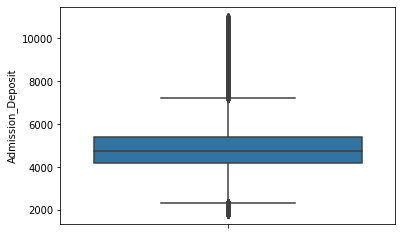

In [9]:
sns.boxplot(y=df_train_initial['Admission_Deposit'])

<AxesSubplot:xlabel='Severity of Illness', ylabel='Admission_Deposit'>

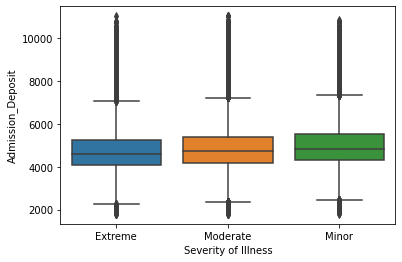

In [10]:
sns.boxplot(y=df_train_initial['Admission_Deposit'], x=df_train_initial['Severity of Illness'])

<AxesSubplot:xlabel='Type of Admission', ylabel='Admission_Deposit'>

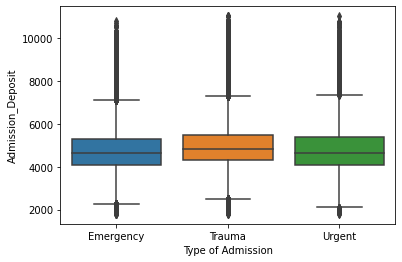

In [11]:
sns.boxplot(y=df_train_initial['Admission_Deposit'], x=df_train_initial['Type of Admission'])

**Dummy Encoding**

In [12]:
#Prepare for dummy coding of Severity of illness

pd.unique(df_train_initial.loc[:,'Severity of Illness'])


array(['Extreme', 'Moderate', 'Minor'], dtype=object)

In [13]:
#Dummy Coding of Type of Admission

dummy_vars_severity_train = pd.get_dummies(df_train_initial['Type of Admission'], prefix = "ToA_").iloc[:,:3]
dummy_vars_severity_test = pd.get_dummies(df_test_initial['Type of Admission'], prefix = "ToA_").iloc[:,:3]

df_train = pd.concat([df_train_initial, dummy_vars_severity_train], axis=1)
df_test = pd.concat([df_test_initial, dummy_vars_severity_test], axis=1)


df_train.head(5)

,case_id,Hospital_code,Hospital_type_code,City_Code_Hospital,Hospital_region_code,Available Extra Rooms in Hospital,Department,Ward_Type,Ward_Facility_Code,Bed Grade,...,City_Code_Patient,Type of Admission,Severity of Illness,Visitors with Patient,Age,Admission_Deposit,Stay,ToA__Emergency,ToA__Trauma,ToA__Urgent
0,1,8,c,3,Z,3,radiotherapy,R,F,2.0,...,7.0,Emergency,Extreme,2,51-60,4911.0,0-10,1,0,0
1,2,2,c,5,Z,2,radiotherapy,S,F,2.0,...,7.0,Trauma,Extreme,2,51-60,5954.0,41-50,0,1,0
2,3,10,e,1,X,2,anesthesia,S,E,2.0,...,7.0,Trauma,Extreme,2,51-60,4745.0,31-40,0,1,0
3,4,26,b,2,Y,2,radiotherapy,R,D,2.0,...,7.0,Trauma,Extreme,2,51-60,7272.0,41-50,0,1,0
4,5,26,b,2,Y,2,radiotherapy,S,D,2.0,...,7.0,Trauma,Extreme,2,51-60,5558.0,41-50,0,1,0


In [14]:
#Prepare for dummy coding of age

pd.unique(df_train_initial.loc[:,'Age'])

array(['51-60', '71-80', '31-40', '41-50', '81-90', '61-70', '21-30',
       '11-20', '0-10', '91-100'], dtype=object)

In [15]:
#Lower the amount of categories for age
def f(row):
    if row['Age'] in  ['0-10', '11-20', '21-30']:
        val = '0-30'
    elif row['Age'] in  ['31-40', '41-50', '51-60']:
        val = '31-60'
    else:
        val = 'over 60'
    return val

#create new column 'Age_Range' using the function above
df_train['Age_Range'] = df_train.apply(f, axis=1)
df_test['Age_Range'] = df_test.apply(f, axis=1)

df_train.head(5)

,case_id,Hospital_code,Hospital_type_code,City_Code_Hospital,Hospital_region_code,Available Extra Rooms in Hospital,Department,Ward_Type,Ward_Facility_Code,Bed Grade,...,Type of Admission,Severity of Illness,Visitors with Patient,Age,Admission_Deposit,Stay,ToA__Emergency,ToA__Trauma,ToA__Urgent,Age_Range
0,1,8,c,3,Z,3,radiotherapy,R,F,2.0,...,Emergency,Extreme,2,51-60,4911.0,0-10,1,0,0,31-60
1,2,2,c,5,Z,2,radiotherapy,S,F,2.0,...,Trauma,Extreme,2,51-60,5954.0,41-50,0,1,0,31-60
2,3,10,e,1,X,2,anesthesia,S,E,2.0,...,Trauma,Extreme,2,51-60,4745.0,31-40,0,1,0,31-60
3,4,26,b,2,Y,2,radiotherapy,R,D,2.0,...,Trauma,Extreme,2,51-60,7272.0,41-50,0,1,0,31-60
4,5,26,b,2,Y,2,radiotherapy,S,D,2.0,...,Trauma,Extreme,2,51-60,5558.0,41-50,0,1,0,31-60


In [16]:
#Dummy Coding of Age
dummy_vars_Age_Range_train = pd.get_dummies(df_train['Age_Range'], prefix = "AR_").iloc[:,:3]

dummy_vars_Age_Range_train.head(5)

dummy_vars_Age_Range_test = pd.get_dummies(df_test['Age_Range'], prefix = "AR_").iloc[:,:3]

dummy_vars_Age_Range_test.head(5)

df_train = pd.concat([df_train, dummy_vars_Age_Range_train], axis=1)
df_test = pd.concat([df_test, dummy_vars_Age_Range_test], axis=1)

df_train.head(5)



,case_id,Hospital_code,Hospital_type_code,City_Code_Hospital,Hospital_region_code,Available Extra Rooms in Hospital,Department,Ward_Type,Ward_Facility_Code,Bed Grade,...,Age,Admission_Deposit,Stay,ToA__Emergency,ToA__Trauma,ToA__Urgent,Age_Range,AR__0-30,AR__31-60,AR__over 60
0,1,8,c,3,Z,3,radiotherapy,R,F,2.0,...,51-60,4911.0,0-10,1,0,0,31-60,0,1,0
1,2,2,c,5,Z,2,radiotherapy,S,F,2.0,...,51-60,5954.0,41-50,0,1,0,31-60,0,1,0
2,3,10,e,1,X,2,anesthesia,S,E,2.0,...,51-60,4745.0,31-40,0,1,0,31-60,0,1,0
3,4,26,b,2,Y,2,radiotherapy,R,D,2.0,...,51-60,7272.0,41-50,0,1,0,31-60,0,1,0
4,5,26,b,2,Y,2,radiotherapy,S,D,2.0,...,51-60,5558.0,41-50,0,1,0,31-60,0,1,0


In [17]:
# dummy encode the Hospital_region_code
dummy_vars_HospitalCode_train = pd.get_dummies(df_train['Hospital_region_code'], prefix = "HRC_").iloc[:,:3]
dummy_vars_HospitalCode_test = pd.get_dummies(df_test['Hospital_region_code'], prefix = "HRC_").iloc[:,:3]

#appending the values to the test and train dataset
df_train = pd.concat([df_train, dummy_vars_HospitalCode_train], axis=1)
df_test = pd.concat([df_test, dummy_vars_HospitalCode_test], axis=1)
df_test.head(5)

,case_id,Hospital_code,Hospital_type_code,City_Code_Hospital,Hospital_region_code,Available Extra Rooms in Hospital,Department,Ward_Type,Ward_Facility_Code,Bed Grade,...,ToA__Emergency,ToA__Trauma,ToA__Urgent,Age_Range,AR__0-30,AR__31-60,AR__over 60,HRC__X,HRC__Y,HRC__Z
0,318439,21,c,3,Z,3,gynecology,S,A,2.0,...,1,0,0,over 60,0,0,1,0,0,1
1,318440,29,a,4,X,2,gynecology,S,F,2.0,...,0,1,0,over 60,0,0,1,1,0,0
2,318441,26,b,2,Y,3,gynecology,Q,D,4.0,...,1,0,0,over 60,0,0,1,0,1,0
3,318442,6,a,6,X,3,gynecology,Q,F,2.0,...,0,1,0,over 60,0,0,1,1,0,0
4,318443,28,b,11,X,2,gynecology,R,F,2.0,...,0,1,0,over 60,0,0,1,1,0,0


# Feature Engineering & Variable Selection

In [18]:
df_train['Severity of Illness'].unique()

array(['Extreme', 'Moderate', 'Minor'], dtype=object)

In [19]:
#Create a new column: Severity of Illness Numeric
#Key: 0=Minor, 1=Moderate, 2=Severe
# Ordinality of the values is based on the severity of the patient's illness.

illness_dict = {'Minor': 0, 'Moderate': 1, 'Severe': 2}
df_train['Severity of Illness'] = df_train['Severity of Illness'].replace(illness_dict.keys(), illness_dict.values())
df_test['Severity of Illness'] = df_test['Severity of Illness'].replace(illness_dict.keys(), illness_dict.values())

<AxesSubplot:xlabel='Department', ylabel='count'>

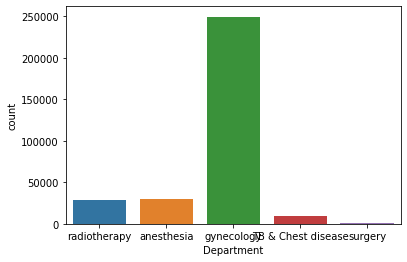

In [20]:
#view unique values of Department
import matplotlib.pyplot as plt

pd.unique(df_train.loc[:,'Department'])

sns.countplot(data=df_train,x='Department')

In [21]:
df_train['Department'].unique()

array(['radiotherapy', 'anesthesia', 'gynecology', 'TB & Chest disease',
       'surgery'], dtype=object)

In [22]:
#Create a new column: Department Numeric
#Key: 0=TB & Chest disease, 1=anesthesia, 2=radiotherapy, 3=gynecology
# Ordinality of the values is based on the no. of patients in each category.

dpt_dict = {'gynecology': 3, 'radiotherapy': 2, 'anesthesia': 1, 'TB & Chest disease': 0}
df_train['Department'] = df_train['Department'].replace(dpt_dict.keys(), dpt_dict.values())
df_test['Department'] = df_test['Department'].replace(dpt_dict.keys(), dpt_dict.values())

In [23]:
df_train.head()

,case_id,Hospital_code,Hospital_type_code,City_Code_Hospital,Hospital_region_code,Available Extra Rooms in Hospital,Department,Ward_Type,Ward_Facility_Code,Bed Grade,...,ToA__Emergency,ToA__Trauma,ToA__Urgent,Age_Range,AR__0-30,AR__31-60,AR__over 60,HRC__X,HRC__Y,HRC__Z
0,1,8,c,3,Z,3,2,R,F,2.0,...,1,0,0,31-60,0,1,0,0,0,1
1,2,2,c,5,Z,2,2,S,F,2.0,...,0,1,0,31-60,0,1,0,0,0,1
2,3,10,e,1,X,2,1,S,E,2.0,...,0,1,0,31-60,0,1,0,1,0,0
3,4,26,b,2,Y,2,2,R,D,2.0,...,0,1,0,31-60,0,1,0,0,1,0
4,5,26,b,2,Y,2,2,S,D,2.0,...,0,1,0,31-60,0,1,0,0,1,0


Ward Type and Hospital Type code shows no significance towards the stay of the patient in the hospital hence we are eliminating these variables.We have considered type of department and found that  ward type is a sub unit of department which has no additional input to our dataset.

In [24]:
#view unique ward type values
pd.unique(df_train['Ward_Type'])

array(['R', 'S', 'Q', 'P', 'T', 'U'], dtype=object)

In [25]:
pd.unique(df_train['Hospital_type_code'])

array(['c', 'e', 'b', 'a', 'f', 'd', 'g'], dtype=object)

In [26]:
pd.unique(df_train['Ward_Facility_Code'])

array(['F', 'E', 'D', 'B', 'A', 'C'], dtype=object)

**Change in target variable('Stay') is only for Train Dataset**

In [27]:
pd.unique(df_train['Stay'])

array(['0-10', '41-50', '31-40', '11-20', '51-60', '21-30', '71-80',
       'More than 100 Days', '81-90', '61-70', '91-100'], dtype=object)

In [28]:
stay_dict = {'0-10': 1, '11-20': 1, '21-30': 1, '31-40': 1, '41-50': 2,
             '51-60': 2, '61-70': 2, '71-80': 3, '81-90': 3, '91-100': 3, 'More than 100 Days': 3}
df_train['Stay'] = df_train['Stay'].replace(stay_dict.keys(),stay_dict.values())

In [29]:
df_train.head()

,case_id,Hospital_code,Hospital_type_code,City_Code_Hospital,Hospital_region_code,Available Extra Rooms in Hospital,Department,Ward_Type,Ward_Facility_Code,Bed Grade,...,ToA__Emergency,ToA__Trauma,ToA__Urgent,Age_Range,AR__0-30,AR__31-60,AR__over 60,HRC__X,HRC__Y,HRC__Z
0,1,8,c,3,Z,3,2,R,F,2.0,...,1,0,0,31-60,0,1,0,0,0,1
1,2,2,c,5,Z,2,2,S,F,2.0,...,0,1,0,31-60,0,1,0,0,0,1
2,3,10,e,1,X,2,1,S,E,2.0,...,0,1,0,31-60,0,1,0,1,0,0
3,4,26,b,2,Y,2,2,R,D,2.0,...,0,1,0,31-60,0,1,0,0,1,0
4,5,26,b,2,Y,2,2,S,D,2.0,...,0,1,0,31-60,0,1,0,0,1,0


Dropping irrelevant columns


In [30]:
#dropping variables from train and test dataset
df_train_var=df_train.drop(axis=1,columns=['Ward_Facility_Code','Hospital_type_code','Ward_Type','case_id','patientid','Age',
                                           'Ward_Type','Age_Range','Type of Admission','Hospital_region_code'])

df_test_var=df_test.drop(axis=1,columns=['Ward_Facility_Code','Hospital_type_code','Ward_Type','case_id','patientid','Age',
                                                       'Ward_Type','Age_Range',
                                                       'Type of Admission','Hospital_region_code'])
                                                       
df_test_var.head(5)


,Hospital_code,City_Code_Hospital,Available Extra Rooms in Hospital,Department,Bed Grade,City_Code_Patient,Severity of Illness,Visitors with Patient,Admission_Deposit,ToA__Emergency,ToA__Trauma,ToA__Urgent,AR__0-30,AR__31-60,AR__over 60,HRC__X,HRC__Y,HRC__Z
0,21,3,3,3,2.0,2.0,1,2,3095.0,1,0,0,0,0,1,0,0,1
1,29,4,2,3,2.0,2.0,1,4,4018.0,0,1,0,0,0,1,1,0,0
2,26,2,3,3,4.0,2.0,1,3,4492.0,1,0,0,0,0,1,0,1,0
3,6,6,3,3,2.0,2.0,1,3,4173.0,0,1,0,0,0,1,1,0,0
4,28,11,2,3,2.0,2.0,1,4,4161.0,0,1,0,0,0,1,1,0,0


Final Dataset for checking variable correlation

In [31]:
df_train=df_train_var
df_test=df_test_var
df_test.head()

,Hospital_code,City_Code_Hospital,Available Extra Rooms in Hospital,Department,Bed Grade,City_Code_Patient,Severity of Illness,Visitors with Patient,Admission_Deposit,ToA__Emergency,ToA__Trauma,ToA__Urgent,AR__0-30,AR__31-60,AR__over 60,HRC__X,HRC__Y,HRC__Z
0,21,3,3,3,2.0,2.0,1,2,3095.0,1,0,0,0,0,1,0,0,1
1,29,4,2,3,2.0,2.0,1,4,4018.0,0,1,0,0,0,1,1,0,0
2,26,2,3,3,4.0,2.0,1,3,4492.0,1,0,0,0,0,1,0,1,0
3,6,6,3,3,2.0,2.0,1,3,4173.0,0,1,0,0,0,1,1,0,0
4,28,11,2,3,2.0,2.0,1,4,4161.0,0,1,0,0,0,1,1,0,0


### Selecting Variable Correlation based on pearsons coefficient heatmap

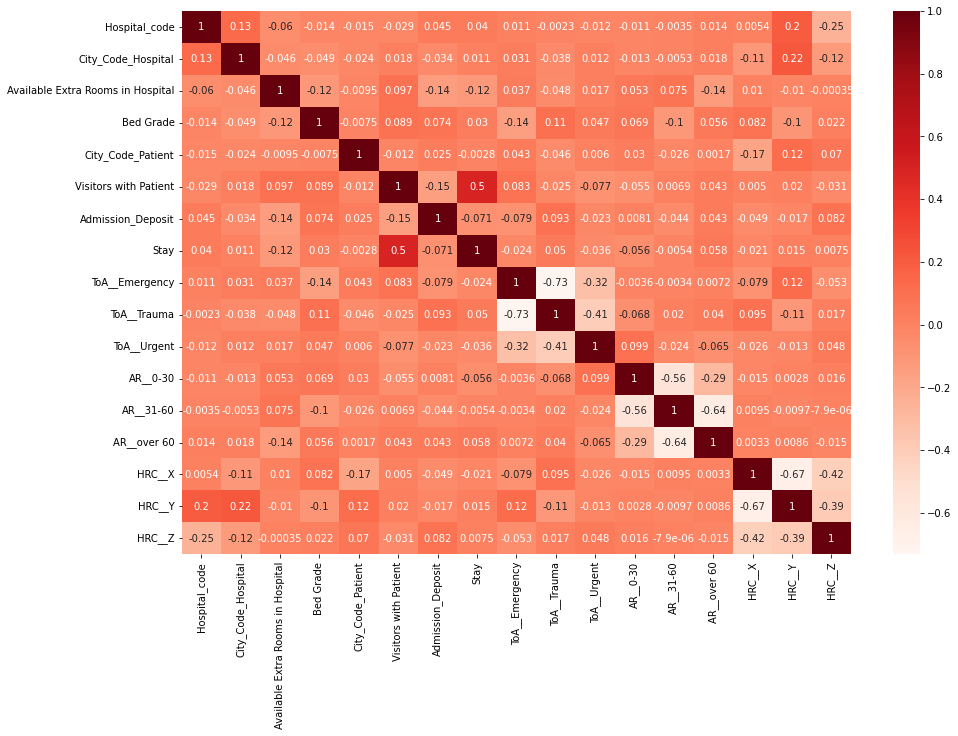

In [32]:
#Using Pearson Correlation
plt.figure(figsize=(15,10))
cor = df_train.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

**Above heatmap displays a picture of the impact of variables on the target variable "Stay Adjusted"**.    
**VistiorswithPatient** is the most significant feature in our data.

In [33]:
#Correlation with output variable
cor_target = abs(cor["Stay"])
# used absolute values to select variables that have positive and negative impact
#Selecting highly correlated features
relevant_features = cor_target[cor_target>0.02] # threshold for variable selection =0.2
relevant_features


Hospital_code                        0.039905
Available Extra Rooms in Hospital    0.117671
Bed Grade                            0.030108
Visitors with Patient                0.497877
Admission_Deposit                    0.071185
Stay                                 1.000000
ToA__Emergency                       0.024449
ToA__Trauma                          0.049531
ToA__Urgent                          0.036015
AR__0-30                             0.056104
AR__over 60                          0.058358
HRC__X                               0.021025
Name: Stay, dtype: float64

**Above list of variables are selected for the building the model based on the pvalue >0.2**

In [34]:
df_train_final=df_train[['Hospital_code','Available Extra Rooms in Hospital','Bed Grade',
                         'Visitors with Patient','Admission_Deposit','ToA__Emergency','ToA__Trauma','ToA__Urgent',
                         'AR__0-30','AR__over 60','Stay']]
df_train_final.head(5)


,Hospital_code,Available Extra Rooms in Hospital,Bed Grade,Visitors with Patient,Admission_Deposit,ToA__Emergency,ToA__Trauma,ToA__Urgent,AR__0-30,AR__over 60,Stay
0,8,3,2.0,2,4911.0,1,0,0,0,0,1
1,2,2,2.0,2,5954.0,0,1,0,0,0,2
2,10,2,2.0,2,4745.0,0,1,0,0,0,1
3,26,2,2.0,2,7272.0,0,1,0,0,0,2
4,26,2,2.0,2,5558.0,0,1,0,0,0,2


In [35]:
df_test_final=df_test[['Hospital_code','Available Extra Rooms in Hospital','Bed Grade',
                         'Visitors with Patient','Admission_Deposit','ToA__Emergency','ToA__Trauma','ToA__Urgent',
                         'AR__0-30','AR__over 60']]
df_test_final.head()

,Hospital_code,Available Extra Rooms in Hospital,Bed Grade,Visitors with Patient,Admission_Deposit,ToA__Emergency,ToA__Trauma,ToA__Urgent,AR__0-30,AR__over 60
0,21,3,2.0,2,3095.0,1,0,0,0,1
1,29,2,2.0,4,4018.0,0,1,0,0,1
2,26,3,4.0,3,4492.0,1,0,0,0,1
3,6,3,2.0,3,4173.0,0,1,0,0,1
4,28,2,2.0,4,4161.0,0,1,0,0,1


# Splitting the dataset

In [36]:
y=df_train_final.iloc[:,-1] #target variable values
x=df_train_final.iloc[:,:-1] #dependent variable


xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.3,random_state=0)

In [37]:
y.unique()

array([1, 2, 3], dtype=int64)

In [38]:
len(xtrain)

222906

In [39]:
len(xtest)

95532

In [40]:
len(ytrain)

222906

In [41]:
len(ytest)

95532

### Renaming the df_test_final dataset to vdata. This is the data that we will be ultimately running our model on after training on the training and validation datasets.

In [42]:
vdata = df_test_final

In [43]:
vdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137057 entries, 0 to 137056
Data columns (total 10 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Hospital_code                      137057 non-null  int64  
 1   Available Extra Rooms in Hospital  137057 non-null  int64  
 2   Bed Grade                          137057 non-null  float64
 3   Visitors with Patient              137057 non-null  int64  
 4   Admission_Deposit                  137057 non-null  float64
 5   ToA__Emergency                     137057 non-null  uint8  
 6   ToA__Trauma                        137057 non-null  uint8  
 7   ToA__Urgent                        137057 non-null  uint8  
 8   AR__0-30                           137057 non-null  uint8  
 9   AR__over 60                        137057 non-null  uint8  
dtypes: float64(2), int64(3), uint8(5)
memory usage: 5.9 MB


In [44]:
#xtest[:5,:]

# Data Standardization

In [45]:

sc= StandardScaler()
xtrain=sc.fit_transform(xtrain)
xtest=sc.transform(xtest)
vdata=sc.transform(vdata)

In [46]:
xtest

array([[-0.3789657 , -1.02610407,  1.57413046, ..., -0.42313265,
        -0.50072049,  1.74652012],
       [ 0.54656079, -0.16923882,  0.42822943, ..., -0.42313265,
        -0.50072049, -0.57256712],
       [-1.18880138,  0.68762642,  0.42822943, ..., -0.42313265,
        -0.50072049,  1.74652012],
       ...,
       [-1.53587381, -1.02610407, -0.71767161, ..., -0.42313265,
        -0.50072049, -0.57256712],
       [-0.03189327, -0.16923882, -0.71767161, ..., -0.42313265,
        -0.50072049, -0.57256712],
       [-1.53587381, -1.02610407, -1.86357264, ..., -0.42313265,
         1.99712218, -0.57256712]])

## Data Modelling

*Here we decided to utilize the models, Decision Tree, Random Forest, and Stochastic Gradient Descent. This is due to their popularity with classification problems and also the ability of decision tree and random forest models to provide visuals of their decision process which can be used for convincing stakeholders and helping them understand the logic behind model decisions.*

### Decision Tree

In [47]:
#Decision Tree
model_1 = DecisionTreeClassifier(random_state=5)
model_1.fit(xtrain, ytrain)
print("Accuracy on training set: {:.3f}".format(model_1.score(xtrain, ytrain)*100))
print("Accuracy on test set: {:.3f}".format(model_1.score(xtest, ytest)*100))

Accuracy on training set: 99.743
Accuracy on test set: 70.066


### Hyperparameter Tuning via Grid Search

In [48]:
parameters = {
    "max_depth":[2,4,10,16,32,None],   
    "criterion": ['entropy'],
    "min_samples_split": [10,50,100,200,300,400],
    "random_state": [0]
}
cv = GridSearchCV(DecisionTreeClassifier(),parameters,cv=5)
cv.fit(xtrain,ytrain)

def display(results):
    print(f'Best parameters are: {results.best_params_}')
    print("\n")
    mean_score = results.cv_results_['mean_test_score']
    std_score = results.cv_results_['std_test_score']
    params = results.cv_results_['params']
    for mean,std,params in zip(mean_score,std_score,params):
        print(f'{round(mean,3)} + or -{round(std,3)} for the {params}')
        
display(cv)        



Best parameters are: {'criterion': 'entropy', 'max_depth': 10, 'min_samples_split': 200, 'random_state': 0}


0.778 + or -0.0 for the {'criterion': 'entropy', 'max_depth': 2, 'min_samples_split': 10, 'random_state': 0}
0.778 + or -0.0 for the {'criterion': 'entropy', 'max_depth': 2, 'min_samples_split': 50, 'random_state': 0}
0.778 + or -0.0 for the {'criterion': 'entropy', 'max_depth': 2, 'min_samples_split': 100, 'random_state': 0}
0.778 + or -0.0 for the {'criterion': 'entropy', 'max_depth': 2, 'min_samples_split': 200, 'random_state': 0}
0.778 + or -0.0 for the {'criterion': 'entropy', 'max_depth': 2, 'min_samples_split': 300, 'random_state': 0}
0.778 + or -0.0 for the {'criterion': 'entropy', 'max_depth': 2, 'min_samples_split': 400, 'random_state': 0}
0.785 + or -0.001 for the {'criterion': 'entropy', 'max_depth': 4, 'min_samples_split': 10, 'random_state': 0}
0.785 + or -0.001 for the {'criterion': 'entropy', 'max_depth': 4, 'min_samples_split': 50, 'random_state': 0}
0.785 + or

In [49]:
#Applying new parameters found via grid search
model_1 = DecisionTreeClassifier(max_depth=10, random_state=0, min_samples_split = 200,criterion = "entropy")
model_1.fit(xtrain, ytrain)
print("Accuracy on training set: {:.3f}".format(model_1.score(xtrain, ytrain)*100))
print("Accuracy on test set: {:.3f}".format(model_1.score(xtest, ytest)*100))

Accuracy on training set: 79.696
Accuracy on test set: 79.313


### Random Forest

In [50]:
#Random Forest Model
model_2 = RandomForestClassifier(n_estimators=100, random_state=0, n_jobs=4)
model_2.fit(xtrain, ytrain)
print("Accuracy on training set: {:.3f}".format(model_2.score(xtrain, ytrain)*100))
print("Accuracy on test set: {:.3f}".format(model_2.score(xtest, ytest)*100))

Accuracy on training set: 99.731
Accuracy on test set: 75.050


### Hyperparameter Tuning via Grid Search

In [52]:
#Hyperparameter Tuning via Grid Search
parameters = {
    "n_estimators":[5,100,200],
    "max_depth":[2,8,16,32,None],   
    "n_jobs": [4],
    "criterion": ['gini', 'entropy'],
    "random_state": [0]
}
cv = GridSearchCV(RandomForestClassifier(),parameters,cv=5)
cv.fit(xtrain,ytrain)

def display(results):
    print(f'Best parameters are: {results.best_params_}')
    print("\n")
    mean_score = results.cv_results_['mean_test_score']
    std_score = results.cv_results_['std_test_score']
    params = results.cv_results_['params']
    for mean,std,params in zip(mean_score,std_score,params):
        print(f'{round(mean,3)} + or -{round(std,3)} for the {params}')
        
display(cv)        



Best parameters are: {'criterion': 'entropy', 'max_depth': 16, 'n_estimators': 100, 'n_jobs': 4, 'random_state': 0}


0.768 + or -0.0 for the {'criterion': 'gini', 'max_depth': 2, 'n_estimators': 5, 'n_jobs': 4, 'random_state': 0}
0.768 + or -0.0 for the {'criterion': 'gini', 'max_depth': 2, 'n_estimators': 100, 'n_jobs': 4, 'random_state': 0}
0.768 + or -0.0 for the {'criterion': 'gini', 'max_depth': 2, 'n_estimators': 200, 'n_jobs': 4, 'random_state': 0}
0.791 + or -0.001 for the {'criterion': 'gini', 'max_depth': 8, 'n_estimators': 5, 'n_jobs': 4, 'random_state': 0}
0.791 + or -0.001 for the {'criterion': 'gini', 'max_depth': 8, 'n_estimators': 100, 'n_jobs': 4, 'random_state': 0}
0.792 + or -0.001 for the {'criterion': 'gini', 'max_depth': 8, 'n_estimators': 200, 'n_jobs': 4, 'random_state': 0}
0.785 + or -0.001 for the {'criterion': 'gini', 'max_depth': 16, 'n_estimators': 5, 'n_jobs': 4, 'random_state': 0}
0.792 + or -0.001 for the {'criterion': 'gini', 'max_depth': 16, 'n_estima

In [53]:
#Applying new parameters found via grid search
model_2 = RandomForestClassifier(n_estimators=100, random_state=0, n_jobs=4, max_depth=16, criterion = "entropy")
model_2.fit(xtrain, ytrain)
print("Accuracy on training set: {:.3f}".format(model_2.score(xtrain, ytrain)*100))
print("Accuracy on test set: {:.3f}".format(model_2.score(xtest, ytest)*100))

Accuracy on training set: 85.977
Accuracy on test set: 79.245


### Stochastic Gradient Descent

In [54]:
#Stochastic Gradient Descent

model_3 = SGDClassifier(loss="hinge", penalty="l2", max_iter=1000, n_jobs=4)
model_3.fit(xtrain, ytrain)
print("Accuracy on training set: {:.3f}".format(model_3.score(xtrain, ytrain)*100))
print("Accuracy on test set: {:.3f}".format(model_3.score(xtest, ytest)*100))



Accuracy on training set: 78.262
Accuracy on test set: 78.163


### Hyperparameter Tuning via Grid Search

In [55]:
#Hyperparameter Tuning via Grid Search
parameters = {
    "loss":["hinge","log","perceptron"],
    "penalty":['l1','l2'],   
    "max_iter": [1000,2000,5000],
    "alpha": [.5,.05,.005,.0005,.00005],
    "n_jobs": [4]
}
cv = GridSearchCV(SGDClassifier(),parameters,cv=5)
cv.fit(xtrain,ytrain)

def display(results):
    print(f'Best parameters are: {results.best_params_}')
    print("\n")
    mean_score = results.cv_results_['mean_test_score']
    std_score = results.cv_results_['std_test_score']
    params = results.cv_results_['params']
    for mean,std,params in zip(mean_score,std_score,params):
        print(f'{round(mean,3)} + or -{round(std,3)} for the {params}')
        
display(cv)        

Best parameters are: {'alpha': 5e-05, 'loss': 'log', 'max_iter': 1000, 'n_jobs': 4, 'penalty': 'l1'}


0.768 + or -0.0 for the {'alpha': 0.5, 'loss': 'hinge', 'max_iter': 1000, 'n_jobs': 4, 'penalty': 'l1'}
0.768 + or -0.0 for the {'alpha': 0.5, 'loss': 'hinge', 'max_iter': 1000, 'n_jobs': 4, 'penalty': 'l2'}
0.768 + or -0.0 for the {'alpha': 0.5, 'loss': 'hinge', 'max_iter': 2000, 'n_jobs': 4, 'penalty': 'l1'}
0.768 + or -0.0 for the {'alpha': 0.5, 'loss': 'hinge', 'max_iter': 2000, 'n_jobs': 4, 'penalty': 'l2'}
0.768 + or -0.0 for the {'alpha': 0.5, 'loss': 'hinge', 'max_iter': 5000, 'n_jobs': 4, 'penalty': 'l1'}
0.768 + or -0.0 for the {'alpha': 0.5, 'loss': 'hinge', 'max_iter': 5000, 'n_jobs': 4, 'penalty': 'l2'}
0.768 + or -0.0 for the {'alpha': 0.5, 'loss': 'log', 'max_iter': 1000, 'n_jobs': 4, 'penalty': 'l1'}
0.769 + or -0.0 for the {'alpha': 0.5, 'loss': 'log', 'max_iter': 1000, 'n_jobs': 4, 'penalty': 'l2'}
0.768 + or -0.0 for the {'alpha': 0.5, 'loss': 'log', 'max_iter': 200

In [56]:
#Applying new parameters found via grid search

model_3 = SGDClassifier(loss="log", penalty="l1", max_iter=1000, alpha = .00005, n_jobs=4)
model_3.fit(xtrain, ytrain)
print("Accuracy on training set: {:.3f}".format(model_3.score(xtrain, ytrain)*100))
print("Accuracy on test set: {:.3f}".format(model_3.score(xtest, ytest)*100))

Accuracy on training set: 78.679
Accuracy on test set: 78.496


## Display model results

In [63]:
# initialise data of lists.
data = {'Model':['Decision Tree', 'Random Forest', 'Stochastic Gradient Descent'], 'Prediction Accuracy - Training':[round(model_1.score(xtrain, ytrain)*100,2), round(model_2.score(xtrain, ytrain)*100,2), round(model_3.score(xtrain, ytrain)*100,2)], 'Prediction Accuracy - Test':[round(model_1.score(xtest, ytest)*100,2), round(model_2.score(xtest, ytest)*100,2), round(model_3.score(xtest, ytest)*100,2)]}
 
# Create DataFrame
dfResults = pd.DataFrame(data)
 
# Print the output.
print(dfResults)

                         Model  Prediction Accuracy - Training  \
0                Decision Tree                           79.70   
1                Random Forest                           85.98   
2  Stochastic Gradient Descent                           78.68   

   Prediction Accuracy - Test  
0                       79.31  
1                       79.24  
2                       78.50  


### Confusion Matrix Results of the models



From the below Confusion Matrix heatmaps we can see that we expect a large # of values in one category for all models. These do not sway our decision to based on model for predicting the validation values on the calculated accuracy scores and processing considerations.


In [64]:


#Creating Prediction Variables to Use for Confusion Matrix Heat Maps for all 3 Models
ypredDT = model_1.predict(xtest) 
ypredRF = model_2.predict(xtest)
ypredSGD = model_3.predict(xtest)



### Decision Tree Confusion Matrix

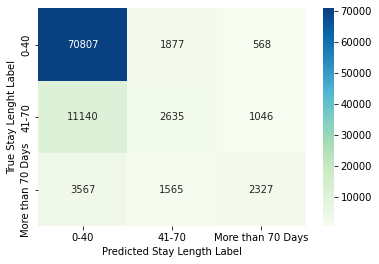

In [65]:


#CM Heatmap 1

cm1 = confusion_matrix(ytest, ypredDT)
ax = sns.heatmap(cm1, annot=True, fmt='g',cmap="GnBu")
ax.set(ylabel="True Stay Lenght Label", xlabel="Predicted Stay Length Label")
ax.xaxis.set_ticklabels(['0-40', '41-70', 'More than 70 Days']); 
ax.yaxis.set_ticklabels(['0-40', '41-70', 'More than 70 Days']);



### Random Forest Confusion Matrix

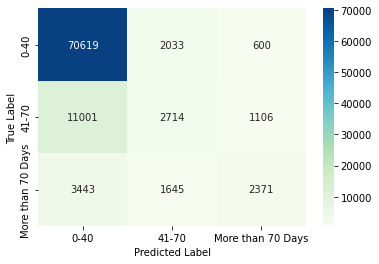

In [66]:


#CM Heatmap 2
cm2 = confusion_matrix(ytest, ypredRF)
ax2 = sns.heatmap(cm2, annot=True, fmt='g',cmap="GnBu")
ax2.set(ylabel="True Label", xlabel="Predicted Label")
ax2.xaxis.set_ticklabels(['0-40', '41-70', 'More than 70 Days']); 
ax2.yaxis.set_ticklabels(['0-40', '41-70', 'More than 70 Days']);




### Stochastic Gradient Descent Confusion Matrix:

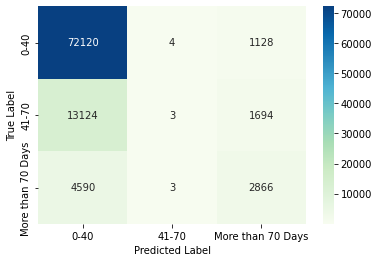

In [67]:


#CM Heatmap 3
cm3 = confusion_matrix(ytest, ypredSGD)
ax3 = sns.heatmap(cm3, annot=True, fmt='g',cmap="GnBu")
ax3.set(ylabel="True Label", xlabel="Predicted Label")
ax3.xaxis.set_ticklabels(['0-40', '41-70', 'More than 70 Days']); 
ax3.yaxis.set_ticklabels(['0-40', '41-70', 'More than 70 Days']);



After analyzing the dataset, preparing the datasets for machine learning and testing 3 different models. We came to the conclusion that of the three models we tested, decision trees, random forest, and stochastic gradient descent; decision tree models are optimal as they get a slightly greater accuracy rate compared to the other models, but runs at over double the speed of the second most accurate model, random forest.

**Predicting validation dataset**

In [68]:
#Prepare to run the model on the validation dataset
df_test_final=df_test_final.replace(np.nan, 0)
vdata=df_test_final.iloc[:,:].values


We checked accuracy on the dataset and we are predicting the values for the validation dataset("test dataset") in our case.
We cannot check accuracy with the validation dataset as there is no target variable, it is like a runtime production dataset which is given as input to model.

In [69]:
#Run the decision tree model on the validation dataset
ypred_v=model_1.predict(vdata) #model_1 as Decision Tree Model

In [70]:
#Verify validation dataset indepedent variables after model run
vdata.shape


(137057, 10)

In [71]:
#Verify validation dataset dependent variable after model run
ypred_v.shape

(137057,)

### Obtaining the validation dataset but with the predicitons

In [72]:
#Reverse the prediction values back into understandable strings
stay_dict_reverse = {'0-40': 1, '41-70': 2, 'More than 70 Days': 3}
df_test_final_w_preds = df_test_final.copy()
df_test_final_w_preds['Stay'] = pd.DataFrame(ypred_v, columns = ['Stay']).replace(stay_dict_reverse.values(), stay_dict_reverse.keys())


### Results display of the first 10 rows:

In [73]:
df_test_final_w_preds.head(10)

,Hospital_code,Available Extra Rooms in Hospital,Bed Grade,Visitors with Patient,Admission_Deposit,ToA__Emergency,ToA__Trauma,ToA__Urgent,AR__0-30,AR__over 60,Stay
0,21,3,2.0,2,3095.0,1,0,0,0,1,41-70
1,29,2,2.0,4,4018.0,0,1,0,0,1,More than 70 Days
2,26,3,4.0,3,4492.0,1,0,0,0,1,More than 70 Days
3,6,3,2.0,3,4173.0,0,1,0,0,1,More than 70 Days
4,28,2,2.0,4,4161.0,0,1,0,0,1,More than 70 Days
5,23,3,2.0,2,4659.0,0,1,0,0,1,41-70
6,26,2,2.0,2,4167.0,0,1,0,0,1,41-70
7,25,4,3.0,2,4396.0,1,0,0,0,0,41-70
8,23,4,3.0,2,4088.0,0,1,0,0,0,41-70
9,23,3,4.0,2,3925.0,0,0,1,0,0,41-70


### Grouped Display of the 3 stay categories and a count of how many were predicted for each in the final unlabeled dataset:

In [74]:
#Create grouped dataframe of predictions  showing how many were made of each category

df_grouped_count_test_final = pd.DataFrame(df_test_final_w_preds.groupby(['Stay'])['Stay'].count())

df_grouped_count_test_final = df_grouped_count_test_final.set_axis(["Count"], axis=1)

df_grouped_count_test_final

,Count
Stay,
0-40,20
41-70,58432
More than 70 Days,78605
